# Checkpoint 1: Data Cleaning 1
* Load the companies and rounds data into two data frames and name them `companies` and `rounds2` respectively.
* Use ecoding = `palmos`
    
_<font color = red>"Note: Not using ISO-8859-1 as encoding type as it is not well equiped to handle the Foreign language data in our case. It is giving incorrect results for rounds2 data"</font>_

In [60]:
import numpy as np
import pandas as pd

companies = pd.read_csv("../companies.txt", sep="\t", encoding = "palmos")
rounds2 = pd.read_csv("../rounds2.csv",sep=",",encoding = "palmos")
sector_mapping = pd.read_csv("../mapping.csv",sep=",",encoding = "palmos")

#### Identify unique companies present in rounds2 dataframe
* Covert `'company_permalink'` to UPPER case and then apply nunique() function

In [61]:
rounds2['company_permalink'].str.upper().nunique(dropna = True)

66368

#### Identify unique companies present in companies dataframe
* Covert `'permalink'` to UPPER case and then apply nunique() function

In [62]:
companies['permalink'].str.upper().nunique(dropna = True)

66368

#### Are there any companies in the rounds2 file which are not present in companies?
* Use isin() function to check all if a company in rounds2 is present in companies dataframe or not
* Use ~functional to get company names in rounds2 which are not present in companies dataframe
* Outcome of below shows there is no company in rounds2 which is not present in companies

In [63]:
rounds2[~rounds2['company_permalink'].str.upper().isin(companies['permalink'].str.upper())]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


#### Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. 
* Convert `'permalink'` to UPPER case in companies dataframe and `'company_permalink'` to UPPER case in rounds2 dataframe
* Use merge function to merge both the dataframes with above columns

In [64]:
companies['permalink'] = companies['permalink'].str.upper()
#companies.head(n=10)
rounds2['company_permalink'] = rounds2['company_permalink'].str.upper()
#rounds2.head(n=10)

In [66]:
master_frame = pd.merge(rounds2,companies,how='inner',left_on='company_permalink',right_on='permalink')
master_frame.shape

(114949, 16)

In [67]:
master_frame.head(n=10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,4/9/2014
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,4/9/2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,1/1/2007
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,nan,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,1/1/2010
6,/ORGANIZATION/01GAMES-TECHNOLOGY,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.00,/ORGANIZATION/01GAMES-TECHNOLOGY,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.00,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,1/1/1997
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,1/1/1997
9,/ORGANIZATION/0XDATA,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.00,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,1/1/2011


### <font color=green>Data Cleanup Activity</font>
1. Duplicate column(s)
    * We have `'permalink'` from companies DataFrame and `'company_permalink'` in rounds2 table
    * After joining this two tables, we have duplicate columns so we can delete `'permalink'` column from master_frame

In [68]:
master_frame = master_frame.drop('permalink', axis=1)

2. Treating Missing values in Columns
    * Calculated percentage of missing values in each column
    * Based on % missing values, we can decide if we need to delete or Impute the columns/rows

> Based on below, we can see that `'funding_round_code'` column has ~73% and `'founded_at'` date column has ~18% of values missing. It is impossible to either delete or impute the rows corresponding to such large number of missing values without losing a lot of data or introducing heavy bias. Thus let's remove these columns.

> There is one more column `'raised_amount_usd'` has ~17% of missing values but it is the main factor to drive investment decision, we should not delete or impute this column.

> `Country_code`, `state_code`, `region` and `city` has 7-10% of missing values but not dropping NaN rows as it might impact `raised_amount_usd` total for `funding_round_type` as it has no NaN or Null values.

In [69]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.91
funded_at                  0.00
raised_amount_usd         17.39
name                       0.00
homepage_url               5.34
category_list              2.97
status                     0.00
country_code               7.55
state_code                 9.52
region                     8.84
city                       8.84
founded_at                17.85
dtype: float64

In [70]:
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)

<font color=blue>**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------** </font>

# Checkpoint 2: Funding Type Analysis
* Find out average funding amount for `venture`, `angel`,`seed` and `private equity type`
* Group by `'funding_round_type'` column and calculate mean of `'raised_amount_usd'` column

In [71]:
pd.options.display.float_format = '{:.2f}'.format
master_frame.groupby(by='funding_round_type')['raised_amount_usd'].mean().sort_values(ascending = False)

funding_round_type
post_ipo_debt           168704571.82
post_ipo_equity          82182493.87
secondary_market         79649630.10
private_equity           73308593.03
undisclosed              19242370.23
debt_financing           17043526.02
venture                  11748949.13
grant                     4300576.34
convertible_note          1453438.54
product_crowdfunding      1363131.07
angel                      958694.47
seed                       719818.00
equity_crowdfunding        538368.21
non_equity_assistance      411203.05
Name: raised_amount_usd, dtype: float64

In [72]:
##Creating a new DataFrame for only 4 Funding type##

funding_types_frame=pd.DataFrame(master_frame.loc[(master_frame['funding_round_type'] == 'angel') | 
                                                  (master_frame['funding_round_type'] == 'venture') | 
                                                  (master_frame['funding_round_type'] == 'seed') | 
                                                  (master_frame['funding_round_type'] == 'private_equity'), :].
                                groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending = False))
funding_types_frame.reset_index(inplace=True)
funding_types_frame.head()

,funding_round_type,raised_amount_usd
0,private_equity,73308593.03
1,venture,11748949.13
2,angel,958694.47
3,seed,719818.00


In [73]:
##To find out Funding type having mean of 5 to 15 million USD per investment round##

funding_types_frame.loc[(funding_types_frame['raised_amount_usd'] > 5000000.00) &
                        (funding_types_frame['raised_amount_usd'] < 15000000.00)]

,funding_round_type,raised_amount_usd
1,venture,11748949.13


####  Identify the investment type and, for further analysis, filter the data so it only contains the chosen investment type.
* Based on above data analysis, `'funding_round_type'` equals to `venture` only satisfies criteria for Spark Funds to invest between <font color=green>5 to 15 million USD per investment round</font>
* Filter the data by creating a new DataFrame for `venture` funding type only

In [74]:
venture_frame = master_frame.loc[master_frame['funding_round_type'] == 'venture', :]
venture_frame.shape

(55494, 13)

<font color=blue>**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------** </font>

# Checkpoint 3: Country Analysis
### <font color=green>Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type) </font> <br>

**_Steps followed:_**
1. Group by = `'country_code'`
2. Sum of `'raised_amount_usd'`
3. Sort values by desc order
4. choose top 9 (head(n=9))
5. For the chosen investment type, make a data frame named `top9` with the top nine countries (based on the total investment amount each country has received)
6. Identify the top three English-speaking countries in the data frame top9
Use **_https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language_ to identify top three English-speaking countries_**

**_Results:_** Based on analysis from Wiki pages and table from below, Top 3 English speaking countries with highest investments are - `USA`, `GBR` and `IND`

In [75]:
top9 = pd.DataFrame(venture_frame.groupby(by='country_code')['raised_amount_usd'].sum().sort_values(ascending = False).head(n=9))
top9.reset_index(inplace=True) ## THIS IS REQUIRED FOR EASY PLOTTING OF BAR CHART FOR TOP 9 COUNTRIES
top9.head(n=10)

,country_code,raised_amount_usd
0,USA,422510842796.00
1,CHN,39835418773.00
2,GBR,20245627416.00
3,IND,14391858718.00
4,CAN,9583332317.00
5,FRA,7259536732.00
6,ISR,6907514579.00
7,DEU,6346959822.00
8,JPN,3363676611.00


<font color=blue>**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------** </font>

# Checkpoint 4: Sector Analysis 1

**_Steps followed:_**
#### <font color=green> Format venture_frame dataframe by slicing the data in `category_list` column</font> <br>
1. Extract the primary sector in separate column `primary_sector` of each category list from the `category_list` column by selecting 1st value before '|' symbol
2. Convert values of `primary_sector` to UPPER so it can be joined with sector_mapping

In [76]:
pd.set_option('mode.chained_assignment', None)
venture_frame.loc[:,'primary_sector'] = venture_frame['category_list'].str.split('|').str[0].copy()
venture_frame.loc[:,'primary_sector'] = venture_frame['primary_sector'].str.upper().copy()
venture_frame.head(n=10)
#venture_frame.info()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,primary_sector
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,MEDIA
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,nan,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,APPLICATION PLATFORMS
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.00,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,APPS
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.00,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,CURATED WEB
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,nan,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,SOFTWARE
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.00,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,BIOTECHNOLOGY
10,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,ANALYTICS
11,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.00,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,ANALYTICS
12,/ORGANIZATION/0XDATA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.00,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,ANALYTICS
22,/ORGANIZATION/1-MAINSTREAM,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.00,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,APPS


#### <font color=green>Clean sector_mapping dataframe</font>
1. Replace `'0' in `category_list` with `'na'
2. Using `'melt'` function, transpose the column names into `master_category` column with values 0 and 1
https://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.melt.html
3. Remove rows with 0s in value column and Blanks in `main_sector` column
4. Drop `Value` column as its of no use 

In [77]:
sector_mapping.replace({'category_list': '0'},{'category_list': 'na'},regex=True,inplace=True)
sector_mapping = sector_mapping.melt(id_vars="category_list",var_name="main_sector")
sector_mapping = sector_mapping.loc[~(sector_mapping["value"]==0)]
sector_mapping = sector_mapping.loc[~(sector_mapping['main_sector']=='Blanks')]
sector_mapping['category_list'] = sector_mapping['category_list'].str.upper()
sector_mapping.drop(columns="value")

,category_list,main_sector
8,ADVENTURE TRAVEL,Automotive & Sports
14,AEROSPACE,Automotive & Sports
45,AUTO,Automotive & Sports
46,AUTOMATED KIOSK,Automotive & Sports
47,AUTOMOTIVE,Automotive & Sports
...,...,...
6121,SOCIAL RECRUITING,"Social, Finance, Analytics, Advertising"
6122,SOCIAL TELEVISION,"Social, Finance, Analytics, Advertising"
6123,SOCIAL TRAVEL,"Social, Finance, Analytics, Advertising"
6134,STOCK EXCHANGES,"Social, Finance, Analytics, Advertising"


In [78]:
venture_sector_frame = pd.merge(venture_frame,sector_mapping,how='inner',left_on='primary_sector',right_on='category_list')
venture_sector_frame.drop(columns=["category_list_y","value"],inplace=True)
venture_sector_frame.head(n=10)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list_x,status,country_code,state_code,region,city,primary_sector,main_sector
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,MEDIA,Entertainment
1,/ORGANIZATION/90MIN,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.00,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,MEDIA,Entertainment
2,/ORGANIZATION/90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.00,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,MEDIA,Entertainment
3,/ORGANIZATION/90MIN,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.00,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,MEDIA,Entertainment
4,/ORGANIZATION/ALL-DEF-DIGITAL,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.00,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,MEDIA,Entertainment
5,/ORGANIZATION/AUDIOSOCKET,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,02-05-2013,650000.00,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,MEDIA,Entertainment
6,/ORGANIZATION/AUDIOSOCKET,/funding-round/4e3a53eec6c609943df752206070b23f,venture,02-09-2009,750000.00,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,MEDIA,Entertainment
7,/ORGANIZATION/AUDIOSOCKET,/funding-round/bc0b412cf2fa7b739e4105ad756b47a4,venture,15-02-2012,1582300.00,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,MEDIA,Entertainment
8,/ORGANIZATION/BABBLE,/funding-round/43cc678b39be3e684bb88501af05ff9b,venture,05-02-2009,2000000.00,Babble,http://www.babble.com,Media|News|Parenting,acquired,USA,NY,New York City,New York,MEDIA,Entertainment
9,/ORGANIZATION/BABBLE,/funding-round/5fdb3dbeeb6eea0243702adc372130f3,venture,12-05-2009,1250000.00,Babble,http://www.babble.com,Media|News|Parenting,acquired,USA,NY,New York City,New York,MEDIA,Entertainment


In [44]:
#pd.DataFrame(venture_sector_frame.groupby(by='main_sector')['main_sector'].count().sort_values(ascending = False))
###TO IDENTIFY MISSING RAISED AMOUNTS FOR EACH COUNTRY DUE TO JOIN OF MAPPING SECTOR AND VENTURE FRAME###
#venture_frame[~venture_frame['primary_sector'].isin(sector_mapping['category_list'])].groupby(by='country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

<font color=blue>**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------** </font>
    
# Checkpoint 5: Sector Analysis 2
### <font color=green>Create three separate data frames D1, D2 and D3 for each of the three countries (USA, GBR, IND) for venture FT</font>
**_DataFrame Creation Tasks:_**
* All the columns of the `master_frame` along with the `primary sector` and the `main sector`
* The total number (or count) of investments for each main sector in a separate column
* The total amount invested in each main sector in a separate column

In [84]:
D1=venture_sector_frame.loc[venture_sector_frame['country_code']=='USA']
D2=venture_sector_frame.loc[venture_sector_frame['country_code']=='GBR']
D3=venture_sector_frame.loc[venture_sector_frame['country_code']=='IND']

#### Table 5.1: Find out main_sector wise Total Investment Count for top 3 countries identified
* TIC_USD = Total Investment Count for USD Country
* TIC_GBR = Total Investment Count for GBR Country
* TIC_IND = Total Investment Count for IND Country

In [85]:
TIC_USD=pd.DataFrame(D1.groupby(by='main_sector')['main_sector'].count().
                     rename('Total_Investment_Count').sort_values(ascending = False))
TIC_USD.head(n=3)

,Total_Investment_Count
main_sector,
Others,8763
Cleantech / Semiconductors,8268
"Social, Finance, Analytics, Advertising",7822


In [86]:
TIC_GBR=pd.DataFrame(D2.groupby(by='main_sector')['main_sector'].count().
                     rename('Total_Investment_Count').sort_values(ascending = False))
TIC_GBR.head(n=3)

,Total_Investment_Count
main_sector,
Others,580
"Social, Finance, Analytics, Advertising",481
Cleantech / Semiconductors,466


In [87]:
TIC_IND=pd.DataFrame(D3.groupby(by='main_sector')['main_sector'].count().
                     rename('Total_Investment_Count').sort_values(ascending = False))
TIC_IND.head(n=3)

,Total_Investment_Count
main_sector,
Others,332
"Social, Finance, Analytics, Advertising",193
"News, Search and Messaging",154


#### Find out main_sector wise Total Investment Amount 
* TIA_USD = Total Investment Amount for USD Country
* TIA_GBR = Total Investment Amount for GBR Country
* TIA_IND = Total Investment Amount for IND Country

In [88]:
TIA_USD=pd.DataFrame(D1.groupby(by='main_sector')['raised_amount_usd'].sum().
                     rename('Total_Investment_Amount').sort_values(ascending = False))
TIA_USD.head(n=8)

,Total_Investment_Amount
main_sector,
Cleantech / Semiconductors,119931874301.00
"Social, Finance, Analytics, Advertising",86331402349.00
Others,82796823598.00
"News, Search and Messaging",45600521085.00
Health,31675057766.00
Manufacturing,24845319470.00
Entertainment,17014560960.00
Automotive & Sports,11632164696.00


In [89]:
TIA_GBR=pd.DataFrame(D2.groupby(by='main_sector')['raised_amount_usd'].sum().
                     rename('Total_Investment_Amount').sort_values(ascending = False))
TIA_GBR.head(n=8)

,Total_Investment_Amount
main_sector,
Cleantech / Semiconductors,5073290093.00
Others,4492219646.00
"Social, Finance, Analytics, Advertising",3773328672.00
"News, Search and Messaging",2956023749.00
Entertainment,1162564878.00
Health,1046654806.00
Manufacturing,1019283214.00
Automotive & Sports,480878712.00


In [90]:
TIA_IND=pd.DataFrame(D3.groupby(by='main_sector')['raised_amount_usd'].sum().
                     rename('Total_Investment_Amount').sort_values(ascending = False))
TIA_IND.head(n=8)

,Total_Investment_Amount
main_sector,
Others,6329507440.00
"News, Search and Messaging",1739579948.00
"Social, Finance, Analytics, Advertising",1578804920.00
Automotive & Sports,1556350000.00
Entertainment,976191777.00
Cleantech / Semiconductors,786444633.00
Manufacturing,730260000.00
Health,564370000.00


### Merge Total Investment Amount and Total Investment Count frames of 3 countries to respective main data frames

In [91]:
D1=pd.merge(pd.merge(D1,TIC_USD,how='inner',left_on='main_sector',right_index=True),
                    TIA_USD,how='inner',left_on='main_sector',right_index=True)
D1.shape

(38020, 17)

In [92]:
D2=pd.merge(pd.merge(D2,TIC_GBR,how='inner',left_on='main_sector',right_index=True),
            TIA_GBR,how='inner',left_on='main_sector',right_index=True)
D2.shape

(2264, 17)

In [93]:
D3=pd.merge(pd.merge(D3,TIC_IND,how='inner',left_on='main_sector',right_index=True),
            TIA_IND,how='inner',left_on='main_sector',right_index=True)
D3.shape

(984, 17)

#### Table 5.1: For point 3 (TOP sector count-wise), finding comapies received highest investment in term of count [Not amount]

In [94]:
D1.loc[D1['main_sector']=='Others'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending = False)

company_permalink
/ORGANIZATION/TERASCALA                          13
/ORGANIZATION/VECTORMAX                          12
/ORGANIZATION/LECERE                             11
/ORGANIZATION/BTI-SYSTEMS                        10
/ORGANIZATION/APPROVA                             9
                                                 ..
/ORGANIZATION/GLOBALCRYPTO                        0
/ORGANIZATION/PARK-PLACE-INTERNATIONAL            0
/ORGANIZATION/ALLEGRO-DEVELOPMENT-CORPORATION     0
/ORGANIZATION/DARTDEVICES                         0
/ORGANIZATION/004-TECHNOLOGIES                    0
Name: raised_amount_usd, Length: 4884, dtype: int64

In [95]:
D2.loc[D2['main_sector']=='Others'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending = False)

company_permalink
/ORGANIZATION/ROSTIMA             8
/ORGANIZATION/ELECTRIC-CLOUD      7
/ORGANIZATION/HELVETA             6
/ORGANIZATION/PICOCHIP            6
/ORGANIZATION/MYOPTIQUE-GROUP     5
                                 ..
/ORGANIZATION/CASEHUB             0
/ORGANIZATION/WEES                0
/ORGANIZATION/CSL-DUALCOM         0
/ORGANIZATION/EXG                 0
/ORGANIZATION/GIRL-MEETS-DRESS    0
Name: raised_amount_usd, Length: 387, dtype: int64

In [96]:
D3.loc[D3['main_sector']=='Others'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending = False)

company_permalink
/ORGANIZATION/FLIPKART                        9
/ORGANIZATION/MYNTRA                          8
/ORGANIZATION/SNAPDEAL                        5
/ORGANIZATION/CANVERA-DIGITAL-TECHNOLOGIES    5
/ORGANIZATION/TUTORVISTA-COM                  5
                                             ..
/ORGANIZATION/THE-BEER-CAF                    0
/ORGANIZATION/CAREERS360                      0
/ORGANIZATION/KARMA-RECYCLING                 0
/ORGANIZATION/BOOND                           0
/ORGANIZATION/TRAVELKHANA-COM                 0
Name: raised_amount_usd, Length: 221, dtype: int64

#### Table 5.1: For point 4 (second best sector count-wise), finding comapies received highest investment in term of count [Not amount]

In [97]:
D1.loc[D1['main_sector']=='Cleantech / Semiconductors'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending = False)

company_permalink
/ORGANIZATION/PRO-PHARMACEUTICALS           12
/ORGANIZATION/TIGO-ENERGY                   12
/ORGANIZATION/AVIIR                         12
/ORGANIZATION/COVENANT-SURGICAL-PARTNERS    12
/ORGANIZATION/CNS-RESPONSE                  11
                                            ..
/ORGANIZATION/DIGITAL-CURRENCY-GROUP         0
/ORGANIZATION/CATAMARAN-2                    0
/ORGANIZATION/VERDANT-POWER                  0
/ORGANIZATION/PEAR-THERAPEUTICS              0
/ORGANIZATION/BIODATA                        0
Name: raised_amount_usd, Length: 3930, dtype: int64

In [98]:
D2.loc[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending = False)

company_permalink
/ORGANIZATION/WORLDREMIT               6
/ORGANIZATION/SIMILARWEB               6
/ORGANIZATION/BORRO                    5
/ORGANIZATION/CELLTICK-TECHNOLOGIES    5
/ORGANIZATION/SPORTPURSUIT             5
                                      ..
/ORGANIZATION/TAILGATE-TECHNOLOGIES    0
/ORGANIZATION/TASKPIPES                0
/ORGANIZATION/ASCOTS-OF-LONDON         0
/ORGANIZATION/MOBYKO                   0
/ORGANIZATION/COGNISESS                0
Name: raised_amount_usd, Length: 313, dtype: int64

In [99]:
D3.loc[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending = False)

company_permalink
/ORGANIZATION/MANTHAN-SYSTEMS    6
/ORGANIZATION/SHOPCLUES-COM      4
/ORGANIZATION/KOMLI-MEDIA        4
/ORGANIZATION/POLICYBAZAAR       4
/ORGANIZATION/YEPME-COM          3
                                ..
/ORGANIZATION/FINDABLE-IN        0
/ORGANIZATION/KAE-CAPITAL        0
/ORGANIZATION/EMPOWER-FUTURES    0
/ORGANIZATION/SIMPLI5D           0
/ORGANIZATION/JOMBAY             0
Name: raised_amount_usd, Length: 141, dtype: int64

<font color=blue>**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------** </font>
# Checkpoint 6: Plots

### <font color=green>A plot showing the fraction of total investments (globally) in `angel`, `venture`, `seed`, and `private equity` and the average amount of investment in each funding type </font>

**_Steps followed:_** <br>
1. Created a DataFrame to have only 4 funding types as instructed with sum of `raised_amount_usd`
2. Created two subplots as below:
> 1st as `pie` chart for `Franction of Total Investments(globally)` using DataFrame created in step 1 <br>
> 2nd as `bar` chart for `Average Amount of Investment` using `master_frame` only
        
#### Charts makes it very clear that `'Venture'` funding type is best suited for Spark Funds as it has average investment amount range between 5 m to 15 m USD    

In [101]:
plot_frame1=master_frame.loc[(master_frame['funding_round_type'] == 'angel') | 
                             (master_frame['funding_round_type'] == 'venture') | 
                             (master_frame['funding_round_type'] == 'seed') | 
                             (master_frame['funding_round_type'] == 'private_equity'), :].groupby('funding_round_type')['raised_amount_usd'].sum()
plot_frame1.head(n=10)

funding_round_type
angel              4659255123.00
private_equity   141925436105.00
seed              16989864181.00
venture          590126216876.00
Name: raised_amount_usd, dtype: float64

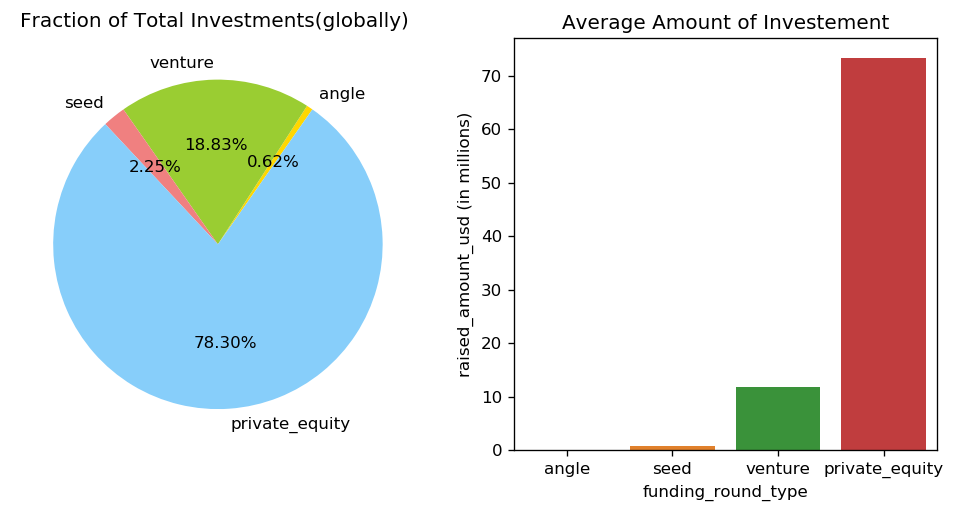

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# subplot 1 - Fraction of Total Investments(globally)
plt.figure(figsize=[10.0,10.0],dpi=120,edgecolor='c',frameon=True)
plt.subplot(221)
plt.title('Fraction of Total Investments(globally) ',pad=7)
# Data to plot
labels = 'angle', 'venture', 'seed', 'private_equity'
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
# Plot
plt.pie(plot_frame1, labels=labels, colors=colors,autopct='%1.2f%%', startangle=55)

# subplot 2 - Average Amount of Investment
plt.subplot(222)
sns.barplot(x=master_frame['funding_round_type'],y=master_frame['raised_amount_usd']/1000000,estimator=np.mean,order=["angle","seed","venture","private_equity"],ci=None)
plt.ylabel("raised_amount_usd (in millions)")
plt.title("Average Amount of Investement") 
plt.show()

### <font color=green> A plot showing the top 9 countries against the total amount of investments of funding type Venture</font>
**_Steps followed:_** <br>
    
1. Created a new DataFrame with Country code and English Speaking Flag as per wiki page provided for top 9 countries
2. Joined top9 and ES_Country DataFrames  
3. Used a `bivariate bar plot` graph to show `Total Invenstment Amount` (Y-Axis) for `Top 9 Countries` (X-Axis) with hue as `English Speaking Country Flag`
    
#### This makes it very clear that the top 3 English speaking countries `USA, GBR, IND` are with highest investment

In [104]:
ES_Country=pd.DataFrame({'country_code': ['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN'],
                        'English_Speaking_Flag': ['Y','N','Y','Y','Y','N','Y','N','N']})
ES_Country.head(n=10)

,country_code,English_Speaking_Flag
0,USA,Y
1,CHN,N
2,GBR,Y
3,IND,Y
4,CAN,Y
5,FRA,N
6,ISR,Y
7,DEU,N
8,JPN,N


In [105]:
top9=pd.merge(top9,ES_Country,how='inner',on='country_code')
top9.head(n=10)

,country_code,raised_amount_usd,English_Speaking_Flag
0,USA,422510842796.00,Y
1,CHN,39835418773.00,N
2,GBR,20245627416.00,Y
3,IND,14391858718.00,Y
4,CAN,9583332317.00,Y
5,FRA,7259536732.00,N
6,ISR,6907514579.00,Y
7,DEU,6346959822.00,N
8,JPN,3363676611.00,N


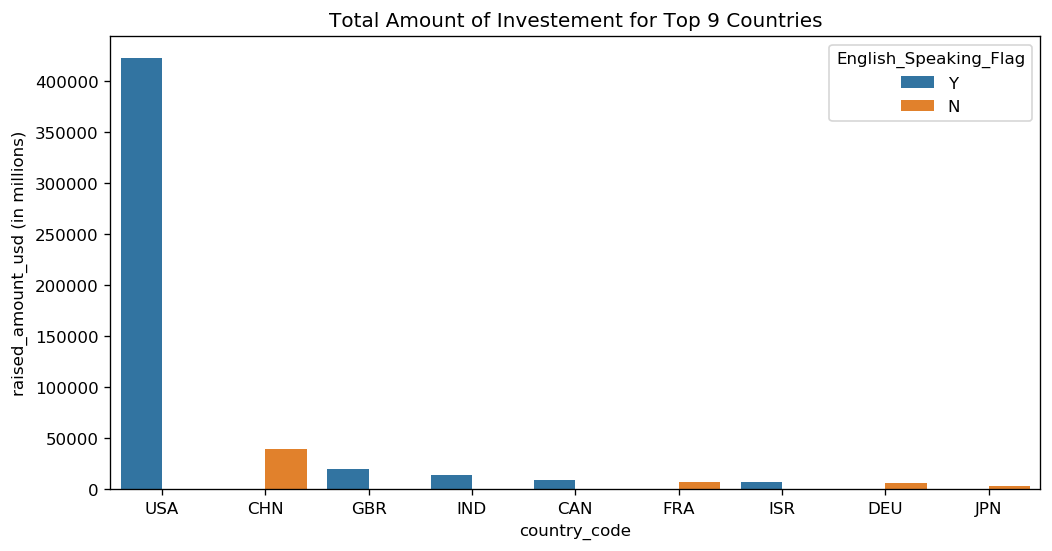

In [106]:
plt.figure(figsize=[10.0,5.0],dpi=120,frameon=True)
sns.barplot(x=top9['country_code'],y=top9['raised_amount_usd']/1000000,hue=top9['English_Speaking_Flag'],ci=None)
plt.ylabel("raised_amount_usd (in millions)")
plt.title("Total Amount of Investement for Top 9 Countries") 
plt.show()

### <font color=green>A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart for the chosen investment type of Venture </font>
* **_Steps followed:_** <br><br>
    _Data Creation:_ <br>
1. Reset Index of Total Investment Count DataFrames for top 3 Countries for easy plotting
2. Took top 3 main sectors by highest Total Investment Count for each Country 
3. Added `Country` Column in each Country DataFrame for bivariate bar plotting of sectors and countries
4. Outer Joined all the 3 Countries DataFrames so total 9 entries will there for top 3 sectors or top 3 Countries
    
    _Plotting:_
5. Used a `bivariate bar plot` graph to show `Total Invenstment Count` (Y-Axis) for `Top 3 Countries` (X-Axis) with hue as `Main-Sector`

In [107]:
TIC_USD.reset_index(inplace=True)
TIC_GBR.reset_index(inplace=True)
TIC_IND.reset_index(inplace=True)

In [108]:
TIC_USD = TIC_USD.sort_values(by='Total_Investment_Count',ascending = False).head(n=3)
TIC_USD['Country'] = 'USA'
TIC_GBR = TIC_GBR.sort_values(by='Total_Investment_Count',ascending = False).head(n=3)
TIC_GBR['Country'] = 'GBR'
TIC_IND = TIC_IND.sort_values(by='Total_Investment_Count',ascending = False).head(n=3)
TIC_IND['Country'] = 'IND'

In [109]:
TIC=pd.merge(pd.merge(TIC_USD,TIC_GBR,how='outer'),TIC_IND,how='outer')
TIC.head(n=10)

,main_sector,Total_Investment_Count,Country
0,Others,8763,USA
1,Cleantech / Semiconductors,8268,USA
2,"Social, Finance, Analytics, Advertising",7822,USA
3,Others,580,GBR
4,"Social, Finance, Analytics, Advertising",481,GBR
5,Cleantech / Semiconductors,466,GBR
6,Others,332,IND
7,"Social, Finance, Analytics, Advertising",193,IND
8,"News, Search and Messaging",154,IND


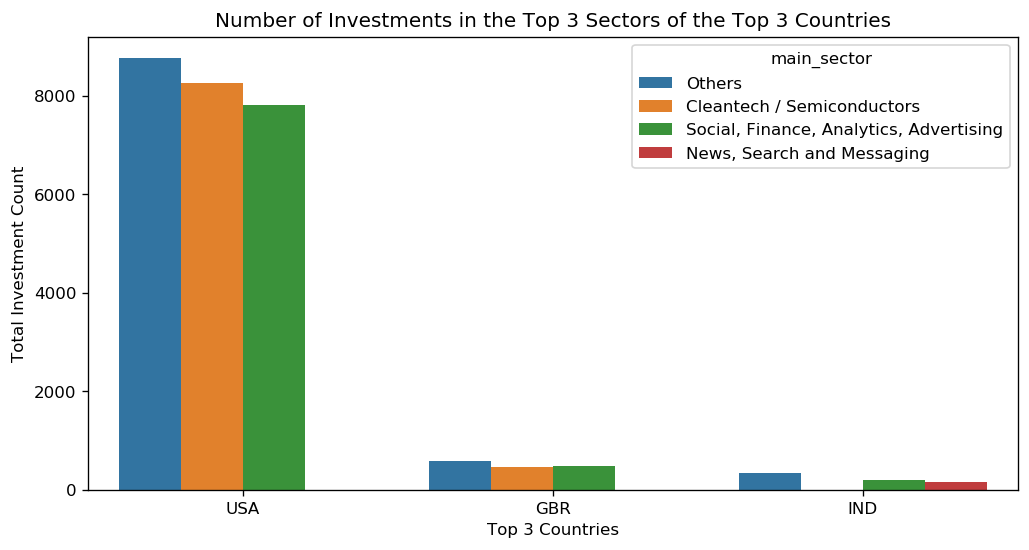

In [110]:
plt.figure(figsize=[10.0,5.0],dpi=120,frameon=True)
sns.barplot(x='Country', y='Total_Investment_Count', hue='main_sector',data=TIC)
plt.ylabel("Total Investment Count")
plt.xlabel("Top 3 Countries")
plt.title("Number of Investments in the Top 3 Sectors of the Top 3 Countries") 
plt.show()